# NEAQS-ITCT 2004

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

matplotlib.rcParams.update({'font.size': 16})

Populating the interactive namespace from numpy and matplotlib


## Retrieve GEOS-Chem data along flighttracks

GC output: Tracers past 67 are not assigned.

In [119]:
cpdc = {'NOx': 'NOx', 'PAN': 'TRA_003', 'HNO3': 'TRA_007', \
        'R4N2': 'TRA_017', 'NH3': 'TRA_030', 'O3': 'TRA_002', \
        'CO': 'TRA_004', 'H2O2': 'TRA_008', 'SO2': 'TRA_026', \
        'NOy': 'NOy'}

In [120]:
dates = [20040705, 20040709, 20040711, 20040712, 20040715, 20040720, \
        20040721, 20040722, 20040725, 20040727, 20040728, 20040731, \
        20040801, 20040803, 20040806, 20040807, 20040808, 20040809, \
        20040810, 20040811, 20040814, 20040815]

plog = 'Planeflight.log.'
dat = pd.read_csv('../../planeflights/' + plog + str(dates[0]), sep='\s*', engine='python')
adat = pd.read_csv('../../planeflights/' + plog + str(20040801), sep='\s*', engine='python')
nqs_mon = dat[dat["TYPE"]=='NEAQS']
nqs_jul = nqs_mon
nqs_aug = adat[adat["TYPE"]=='NEAQS']

for dt in dates:
    day_dat = 0
    nqs_day = 0
    day_dat = pd.read_csv('../../planeflights/' + plog + str(dt), sep='\s*', engine='python')
    nqs_day = day_dat[day_dat["TYPE"]=="NEAQS"]
    nqs_mon = pd.concat([nqs_mon, nqs_day])
    if dt < 20040801:
        nqs_jul = pd.concat([nqs_jul, nqs_day])
    else:
        nqs_aug = pd.concat([nqs_aug, nqs_day])
    
nqs_mon['NOx'] = nqs_mon['NO'] + nqs_mon['NO2']
nqs_jul['NOx'] = nqs_jul['NO'] + nqs_jul['NO2']
nqs_aug['NOx'] = nqs_aug['NO'] + nqs_aug['NO2']

In [121]:
list(nqs_mon) # Available simulated variables

['POINT',
 'TYPE',
 'YYYYMMDD',
 'HHMM',
 'LAT',
 'LON',
 'PRESS',
 'I',
 'J',
 'L',
 'GMAO_TEMP',
 'GMAO_ABSH',
 'GMAO_SURF',
 'GMAO_PSFC',
 'GMAO_TPAUS',
 'GMAO_NDENS',
 'GMAO_UWND',
 'GMAO_VWND',
 'O3',
 'NO',
 'NO2',
 'TRA_001',
 'TRA_002',
 'TRA_004',
 'TRA_064',
 'NOy',
 'TRA_003',
 'TRA_005',
 'TRA_006',
 'TRA_007',
 'TRA_008',
 'TRA_009',
 'TRA_010',
 'TRA_011',
 'TRA_012',
 'TRA_013',
 'TRA_014',
 'TRA_015',
 'TRA_016',
 'TRA_017',
 'TRA_018',
 'TRA_019',
 'TRA_020',
 'TRA_021',
 'TRA_022',
 'TRA_023',
 'TRA_024',
 'TRA_025',
 'TRA_026',
 'TRA_027',
 'TRA_028',
 'TRA_029',
 'TRA_030',
 'TRA_031',
 'TRA_032',
 'TRA_033',
 'TRA_034',
 'TRA_035',
 'TRA_036',
 'TRA_037',
 'TRA_038',
 'TRA_039',
 'TRA_040',
 'TRA_041',
 'TRA_042',
 'TRA_043',
 'TRA_044',
 'TRA_045',
 'TRA_046',
 'TRA_047',
 'TRA_048',
 'TRA_049',
 'TRA_050',
 'TRA_051',
 'TRA_052',
 'TRA_053',
 'TRA_054',
 'TRA_055',
 'TRA_056',
 'TRA_057',
 'TRA_058',
 'TRA_059',
 'TRA_060',
 'TRA_061',
 'TRA_062',
 'TRA_063',
 'T

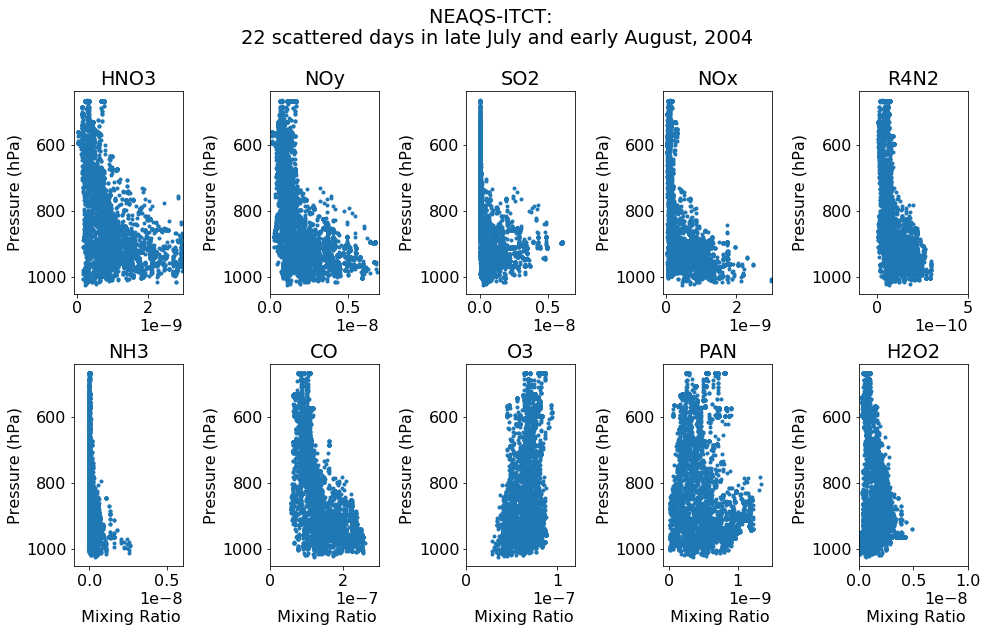

In [122]:
fig = plt.figure(figsize=[14,9])
for idx, cp in enumerate(cpdc):
    fig.add_subplot(2,5 ,idx+1)
    plt.scatter(np.ma.masked_invalid(nqs_mon[cpdc[cp]]), nqs_mon['PRESS'], marker = '.')
    plt.gca().invert_yaxis()
    plt.title(cp)
        
    if cp == 'HNO3':
        plt.xlim([-0.1e-9, 3.0e-9])
    elif cp == 'SO2':
        plt.xlim([-0.1e-8, 0.7e-8])
    elif cp == 'NOx':
        plt.xlim([-0.1e-9, 3.0e-9])
    elif cp == 'R4N2':
        plt.xlim([-0.1e-9, 5e-10])
    elif cp == 'NH3':
        plt.xlim([-0.1e-8, 0.6e-8])
    elif cp == 'CO':
        plt.xlim([0., 3.0e-7])
    elif cp == 'O3':
        plt.xlim([0., 1.2e-7])
    elif cp == 'NOy':
        plt.xlim([0., 0.7e-8])
    elif cp == 'PAN':
        plt.xlim([-0.1e-9, 1.5e-9])
    elif cp == 'H2O2':
        plt.xlim([0., 1.0e-8])
    
    if idx==0 or 5:
        plt.ylabel('Pressure (hPa)')
    if idx>4:
        plt.xlabel('\n Mixing Ratio')
        
plt.suptitle('NEAQS-ITCT: \n 22 scattered days in late July and early August, 2004')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

## Retrieve aircraft observations

In [123]:
pdat = 'Planeflight.dat.'
odat = pd.read_csv('../../flighttracks/2004/07/' + pdat + str(dates[0]) + '.csv', sep=',', engine='python')
aodt = pd.read_csv('../../flighttracks/2004/08/' + pdat + str(20040801) + '.csv', sep=',', engine='python')

nqs_obm = odat[odat['campaign']=='NEAQS-ITCT']
nqs_obj = nqs_obm
nqs_oba = aodt[aodt['campaign']=='NEAQS-ITCT']

for dt in dates:
    day_dat = 0
    idx_day = 0
    if dt < 20040801:
        day_dat = pd.read_csv('../../flighttracks/2004/07/' + pdat + str(dt) + '.csv', sep=',', engine='python')
        nqs_obd = day_dat[day_dat['campaign']=='NEAQS-ITCT']
        nqs_obj = pd.concat([nqs_obj, nqs_obd])
    else:
        day_dat = pd.read_csv('../../flighttracks/2004/08/' + pdat + str(dt) + '.csv', sep=',', engine='python')
        nqs_obd = day_dat[day_dat['campaign']=='NEAQS-ITCT']
        nqs_oba = pd.concat([nqs_oba, nqs_obd])
    nqs_obm = pd.concat([nqs_obm, nqs_obd])

In [124]:
list(nqs_obm) # Available observations variables

['ABSHUM',
 'ALPHA',
 'ALTR',
 'ANs',
 'APAN',
 'Acetaldehyde_PTRMS',
 'Acetic_acid_PTRMS',
 'Acetone_PTRMS',
 'Acetonitrile_PTRMS',
 'Acetylene_pptV',
 'AmbTemp',
 'Ammonium_._20_Deg._C._._1_Atm.',
 'Ammonium_.micro_g.m_STP.',
 'Ammonium_Errors_.micro_g.m_STP.',
 'Attack',
 'BETA',
 'Baro_Altitude',
 'Be.7',
 'Benzene_PTRMS',
 'Benzene_UCIGC',
 'C2Cl4',
 'C2O4',
 'C8_aromatics_PTRMS',
 'C9_aromatics_PTRMS',
 'CABINPRESSURE.MB.',
 'CABINTEMPERATURE.DEGC.',
 'CABIN_ALT',
 'CCl4',
 'CFC.11',
 'CFC.113',
 'CFC.114',
 'CFC.12',
 'CH2Br2',
 'CH2Cl2',
 'CH2O_NCAR',
 'CH2O_URI',
 'CH3Br',
 'CH3CCl3',
 'CH3Cl',
 'CH3I',
 'CH3OOH_URI',
 'CH4_UCIGC',
 'CHBr3',
 'CHCl3',
 'CLEAR',
 'CLOUDY',
 'CLOUD_EXTINCTION',
 'CN_counter_...cm3.',
 'CO',
 'CO10sec',
 'CO2',
 'CO2_mixing_ratio',
 'CORRECTEDEASTVEL.MS.1.',
 'CORRECTEDLATITUDE.DEGREES.',
 'CORRECTEDLONGITUDE.DEGREES.',
 'CORRECTEDNORTHVEL.MS.1.',
 'CO_UCIGC',
 'Ca',
 'Calcium_._20_Deg._C._._1_Atm.',
 'Chloride_._20_Deg._C._._1_Atm.',
 'Cl',
 'Cl

The observations include all tracers (CO, $H_2O_2$, $HNO_3$, NOx, NOy, $O_3$, PAN, $SO_2$ and $NH_3$) except $H_2O_2$ and ANs.

In [125]:
# Variables in both obs and model:
vrs = {'NOx': ['NOx', 'NOx'], 'HNO3': ['HNO3_ppbv', 'TRA_007'], \
       'NOy': ['Sum_NOy_ppbv', 'NOy'], 'NH3': ['NH3_ppbv', 'TRA_030'], \
       'PAN': ['PAN', 'TRA_003'], 'SO2': ['SO2_ppbv', 'TRA_026'], \
       'CO': ['CO', 'TRA_004'], 'O3': ['O3', 'TRA_002']}

## Compare model to aircraft observations

### Vertical profile plots (campaign mean, monthly)

In [126]:
def vertprof_neaqs(mod, obs, faclen, title):
    # Organize the data
    
    # Calculate mean pressure over several intervals
    # Observations
    obs['NOx'] = np.ma.masked_invalid(obs['NO']) + \
                 np.ma.masked_invalid(obs['NO2'])
    obs_s = obs.sort_values('press')
    olen = len(obs_s)
    oprs = obs_s['press'].values.reshape(faclen, olen/faclen)
    mopr = np.mean(oprs, axis=1)
        
    # Model
    mod_s = mod.sort_values('PRESS')
    tlen = len(mod_s) # truncate to allow more pressure levels
    pres = mod_s['PRESS'].values.reshape(faclen, tlen/faclen)
    mprs = np.mean(pres, axis=1) 

    # Start plotting
    fig = plt.figure(figsize=[10,16])
    
    for idx, cp in enumerate(vrs):
        
        # Mask observations where negative in order to take interval mean
        if cp=='CO' or cp=='O3' or cp=='NOx': # units MR
            odat = (obs_s[vrs[cp][0]].values.reshape(faclen, olen/faclen))
        elif cp=='HNO3' or cp=='NH3' or cp=='SO2' or cp=='NOy':
            odat = (obs_s[vrs[cp][0]].values.reshape(faclen, olen/faclen))/ 1e9
        else: # units pptv
            odat = (obs_s[vrs[cp][0]].values.reshape(faclen, olen/faclen))/ 1e12
        modt = np.ma.masked_invalid(odat) # some values also NaN
        mask = modt < 0
        modt = np.ma.masked_array(modt, mask)
        mmod = np.mean(modt, axis=1)
        osdv = np.std(modt, axis=1)
            
        # Model interval mean
        mdat = mod_s[vrs[cp][1]].values.reshape(faclen, tlen/faclen)
        mmmd = np.mean(mdat, axis=1)
    #    msdv = np.std(mmmd, axis=1)
        
        # Plotting
        fig.add_subplot(4, 2, idx+1)
        plt.plot(mmmd, mprs, color='r', marker= '.', label='GC')
        plt.errorbar(mmod, mopr, color='b', xerr=osdv, marker= '*', label='NP3')
        plt.gca().invert_yaxis()
        if cp == 'HNO3':
            plt.title(r'$HNO_3$')
        elif cp == 'H2O2':
            plt.title(r'$H_2O_2$')
        elif cp == 'NH3':
            plt.title(r'$NH_3$')
        elif cp == 'O3':
            plt.title(r'$O_3$')
        elif cp == 'SO2':
            plt.title(r'$SO_2$')
        else:
            plt.title(cp)
        
        if idx==0 or idx==2 or idx==4 or idx==6:
            plt.ylabel('Pressure (hPa)')
        if idx > 5:
            plt.xlabel('\n Mixing Ratio')
        if idx == 1:
            plt.legend(loc='best')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    return fig

##### Campaign mean

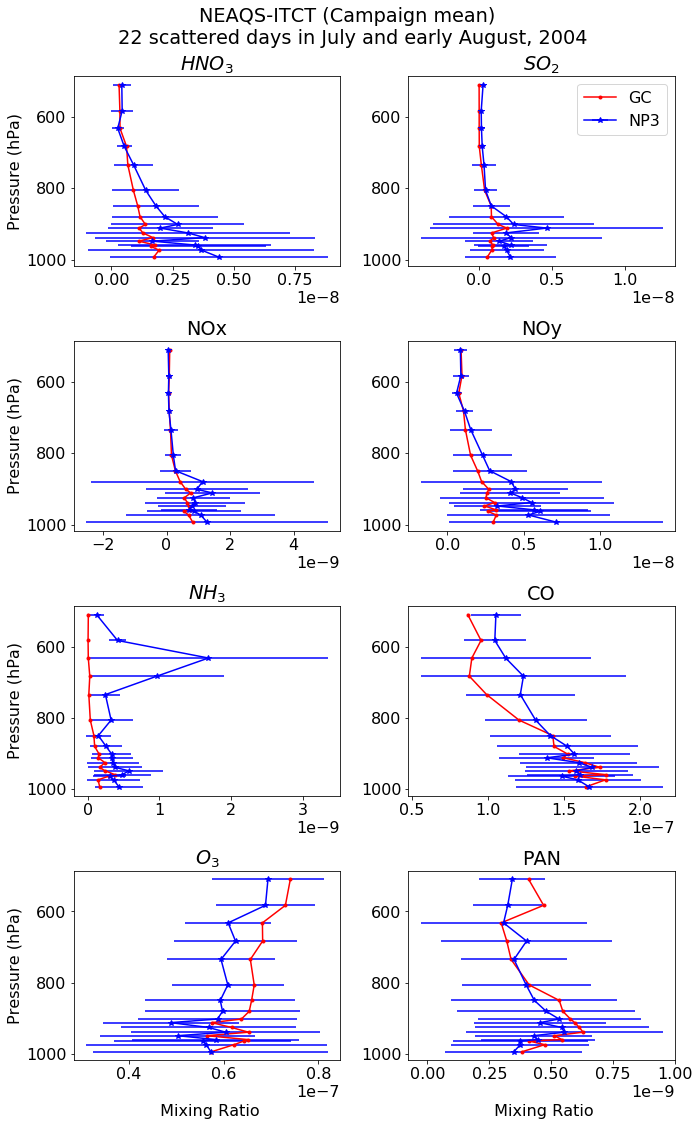

In [127]:
c = vertprof_neaqs(nqs_mon, nqs_obm, 17, 'NEAQS-ITCT (Campaign mean) \n 22 scattered days in July and early August, 2004')
plt.savefig('neaqs/neaqs_prof.jpg')

##### July mean

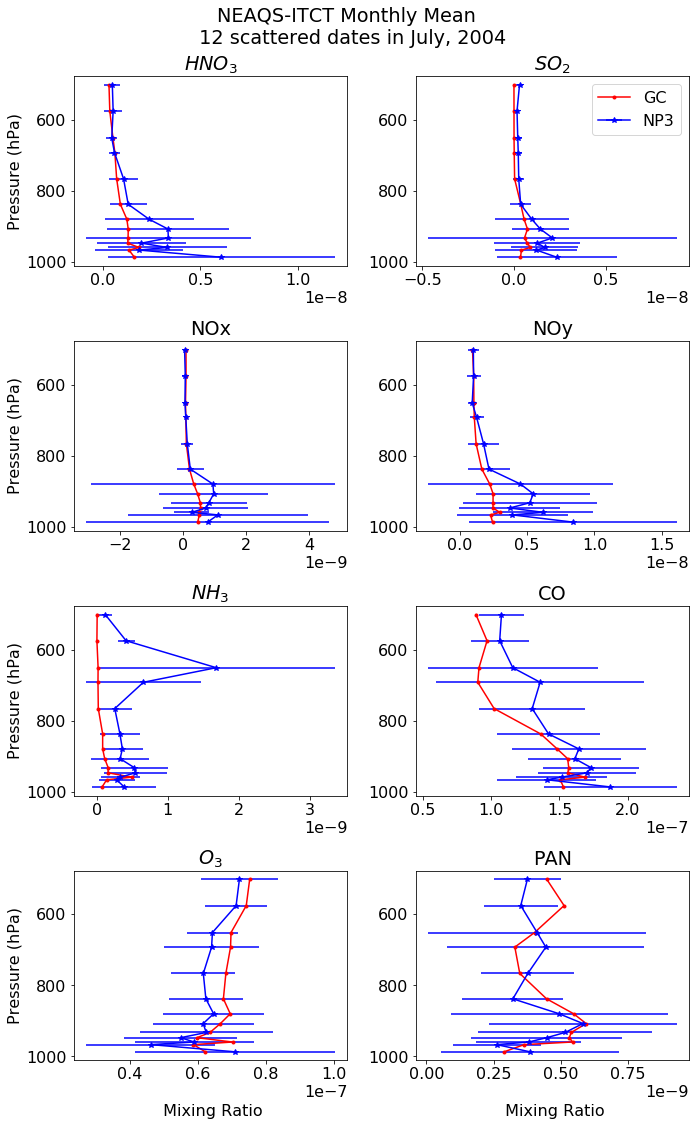

In [128]:
j = vertprof_neaqs(nqs_jul, nqs_obj, 13, 'NEAQS-ITCT Monthly Mean \n 12 scattered dates in July, 2004')
plt.savefig('neaqs/neaqs_jul.jpg')

##### August mean

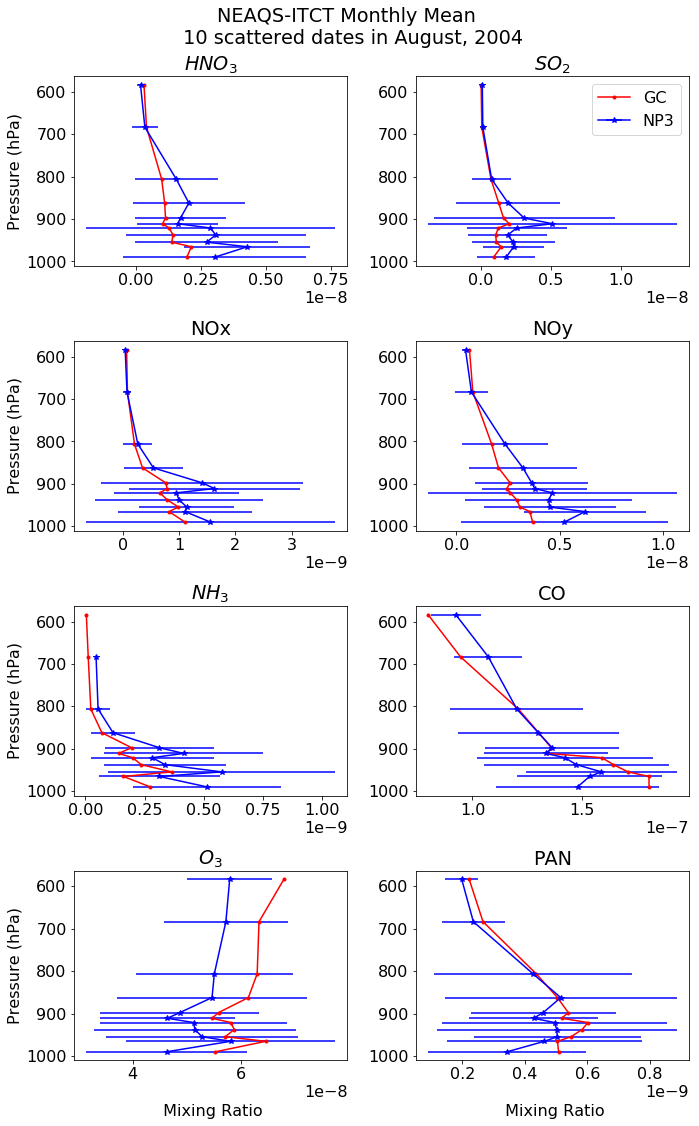

In [129]:
a = vertprof_neaqs(nqs_aug, nqs_oba, 11, 'NEAQS-ITCT Monthly Mean \n 10 scattered dates in August, 2004')
plt.savefig('neaqs/neaqs_aug.jpg')

## Subset aircraft data by meteorological observation

In [130]:
def metsub(dat, varn, cmap, desc): # call (obs dataframe, met variable, colormap scheme, top line of figure title)
    fig = plt.figure(figsize=[12,10])
    for idx, var in enumerate(vrs):
        fig.add_subplot(2, 4,idx+1)
        
        if var=='HNO3' or var=='NH3' or var=='SO2' or var=='NOy':
            adj_dat = np.ma.masked_invalid(dat[vrs[var][0]])/ 1e9
        elif var=='PAN': # units pptv
            adj_dat = np.ma.masked_invalid(dat[vrs[var][0]])/ 1e12
        else:
            adj_dat = np.ma.masked_invalid(dat[vrs[var][0]])

        met = dat[varn]
        obj = plt.scatter(adj_dat, dat['press'], c=met, cmap=cmap, marker = '.')
        plt.gca().invert_yaxis()
        plt.title(var)
            
        if var == 'HNO3':
            plt.xlim([-1e-9, 2.5e-8])
            plt.title(r'$HNO_3$')
        elif var == 'SO2':
            plt.xlim([-0.2e-8, 3e-8])
            plt.title(r'$SO_2$')
        elif var == 'NOx':
            plt.xlim([-0.5e-9, 1.5e-8])
            plt.title(var)
        elif var == 'NH3':
            plt.xlim([-0.1e-8, 0.5e-8])
            plt.title(r'$NH_3$')
        elif var == 'CO':
            plt.xlim([0., 5e-7])
            plt.title(var)
        elif var == 'O3':
            plt.xlim([0., 2e-7])
            plt.title(r'$O_3$')
        elif var == 'NOy':
            plt.xlim([-0.1e-8, 2.3e-8])
            plt.title(var)
        elif var == 'PAN':
            plt.xlim([-0.1e-9, 3e-9])
            plt.title(var)
            
        if idx==0 or 4:
            plt.ylabel('Pressure (hPa)')
        if idx>3:
            plt.xlabel('\n Mixing Ratio')
            
    cbar_ax = fig.add_axes([0.95, 0.15, 0.04, 0.7])
    fig.colorbar(obj, cax=cbar_ax)
    plt.suptitle(desc + '\n NEAQS-ITCT: 22 scattered dates in July and August, 2004 ')
    plt.tight_layout()
    plt.subplots_adjust(top=0.87, right=0.9)

### Temperature

##### Ambient temperature

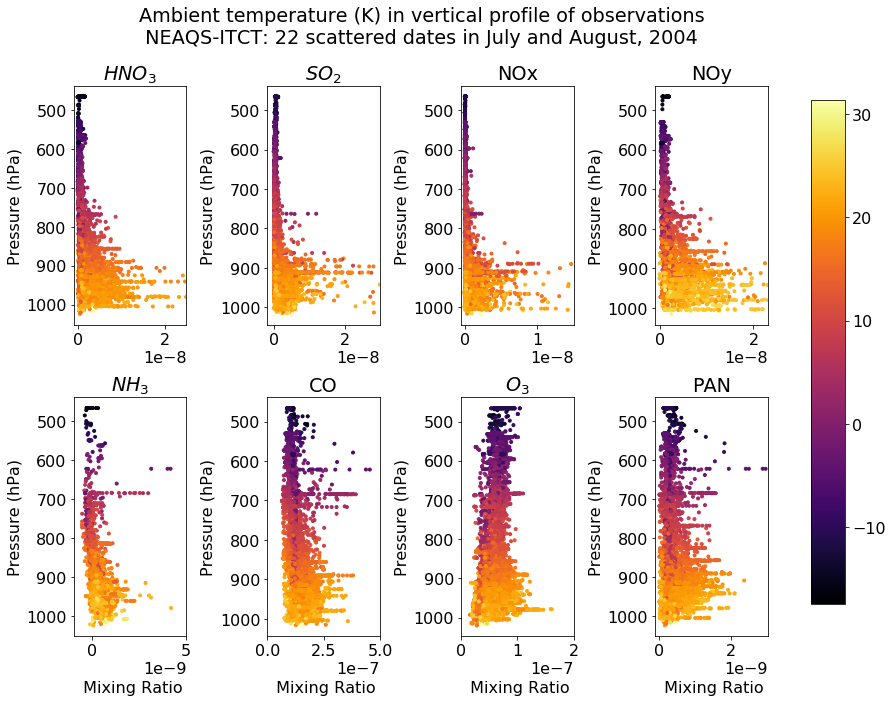

In [131]:
metsub(nqs_obm, 'AmbTemp', 'inferno', 'Ambient temperature (K) in vertical profile of observations')
plt.savefig('neaqs/neaqs_at.jpg')

##### Dew Point

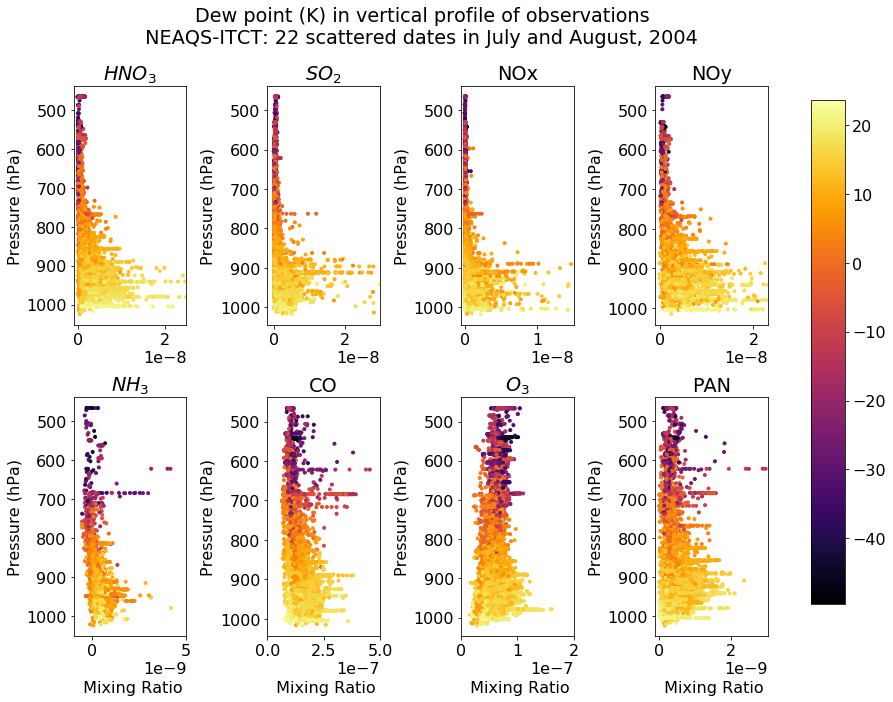

In [132]:
metsub(nqs_obm, 'DewPtTemp', 'inferno', 'Dew point (K) in vertical profile of observations')
plt.savefig('neaqs/neaqs_dp.jpg')

### Moisture Indicators

##### Relative Humidity

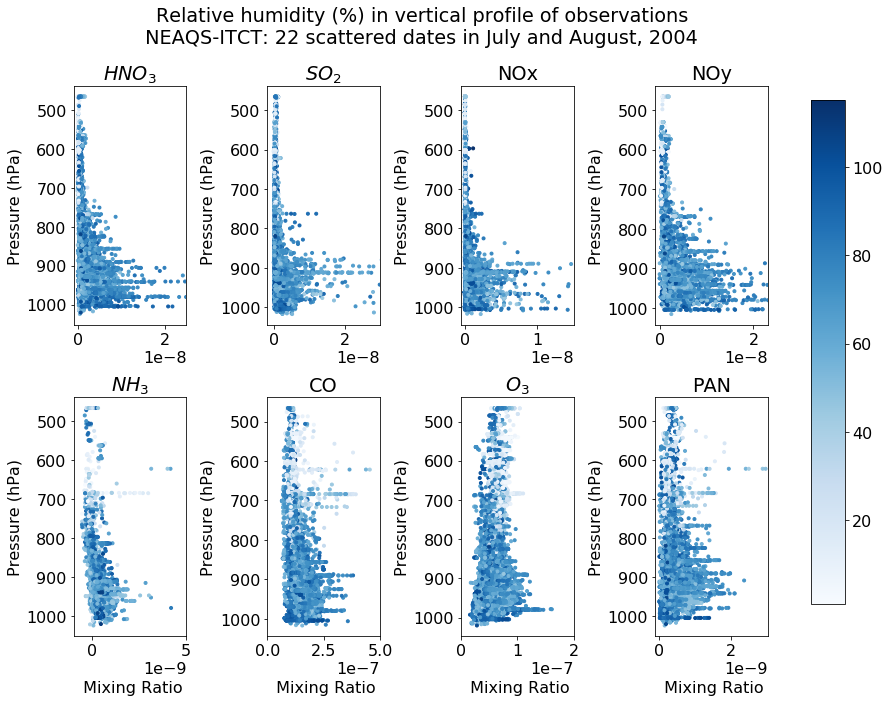

In [133]:
metsub(nqs_obm, 'RelHumidity', 'Blues', 'Relative humidity (%) in vertical profile of observations')
plt.savefig('neaqs/neaqs_rh.jpg')

### Radiation

##### Downward Spectral Irradiance

In [134]:
#metsub(nqs_obm, 'AmbTemp', 'inferno', 'Ambient temperature in vertical profile of observations')

##### Upward Spectral Irradiance

In [135]:
#metsub(nqs_obm, 'AmbTemp', 'inferno', 'Ambient temperature in vertical profile of observations')

Radiation variables were measured during NEAQS-ITCT.  However they are not in Lee Murray's "flighttracks" files, and I am so far unsuccessful in ordering them from TAD.  I will try again over the next few days.